In [1]:
!nvidia-smi

Mon Nov  8 08:24:55 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!git clone https://github.com/fastai/course-v3
%cd /content/course-v3/nbs/dl2

Cloning into 'course-v3'...
remote: Enumerating objects: 5893, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 5893 (delta 0), reused 2 (delta 0), pack-reused 5890
Receiving objects: 100% (5893/5893), 263.10 MiB | 26.96 MiB/s, done.
Resolving deltas: 100% (3251/3251), done.
/content/course-v3/nbs/dl2


In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from exp.nb_07a import *

## Download data

In [ ]:
[(i, getattr(datasets.URLs, i)) for i in dir(datasets.URLs) if 'path' in i.lower()]

[('LOCAL_PATH', PosixPath('/content/course-v3/nbs/dl2'))]

In [ ]:
[(i, getattr(datasets.URLs, i)) for i in dir(datasets.URLs) if 'imagenett' in i.lower()]

[('IMAGENETTE', 'https://s3.amazonaws.com/fast-ai-imageclas/imagenette2'),
 ('IMAGENETTE_160',
  'https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160'),
 ('IMAGENETTE_320',
  'https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-320')]

In [5]:
path = datasets.untar_data(datasets.URLs.IMAGENETTE_160); path

PosixPath('/root/.fastai/data/imagenette2-160')

In [ ]:
path.ls()

[PosixPath('/root/.fastai/data/imagenette2-160/val'),
 PosixPath('/root/.fastai/data/imagenette2-160/.DS_Store'),
 PosixPath('/root/.fastai/data/imagenette2-160/train'),
 PosixPath('/root/.fastai/data/imagenette2-160/noisy_imagenette.csv')]

In [6]:
from pathlib import Path
Path.ls = lambda x: list(x.iterdir())
# Path.ls = lambda x: x

In [7]:
import PIL

In [ ]:
!cat {datasets.__file__}

from .core import *
import hashlib

__all__ = ['URLs', 'Config', 'untar_data', 'download_data', 'datapath4file', 'url2name', 'url2path']

MODEL_URL = 'http://files.fast.ai/models/'
URL = 'http://files.fast.ai/data/examples/'
class URLs():
    "Global constants for dataset and model URLs."
    LOCAL_PATH = Path.cwd()
    S3 = 'https://s3.amazonaws.com/fast-ai-'

    S3_IMAGE    = f'{S3}imageclas/'
    S3_IMAGELOC = f'{S3}imagelocal/'
    S3_NLP      = f'{S3}nlp/'
    S3_COCO     = f'{S3}coco/'
    S3_MODEL    = f'{S3}modelzoo/'

    # main datasets
    ADULT_SAMPLE        = f'{URL}adult_sample'
    BIWI_SAMPLE         = f'{URL}biwi_sample'
    CIFAR               = f'{URL}cifar10'
    COCO_SAMPLE         = f'{S3_COCO}coco_sample'
    COCO_TINY           = f'{URL}coco_tiny'
    HUMAN_NUMBERS       = f'{URL}human_numbers'
    IMDB                = f'{S3_NLP}imdb'
    IMDB_SAMPLE         = f'{URL}imdb_sample'
    ML_SAMPLE           = f'{URL}movie_lens_sample'
    MNIST_SAMPLE        = f'{

In [ ]:
path, path.ls()

(PosixPath('/root/.fastai/data/imagenette2-160'),
 [PosixPath('/root/.fastai/data/imagenette2-160/val'),
  PosixPath('/root/.fastai/data/imagenette2-160/.DS_Store'),
  PosixPath('/root/.fastai/data/imagenette2-160/noisy_imagenette.csv'),
  PosixPath('/root/.fastai/data/imagenette2-160/train')])

In [8]:
def show_dir(x): return dir(x)
Path.ls2 = show_dir
path2 = Path('/root/.fastai/data/imagenette2-160')
path2.ls2()

['__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__fspath__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__truediv__',
 '_accessor',
 '_cached_cparts',
 '_closed',
 '_cparts',
 '_drv',
 '_flavour',
 '_format_parsed_parts',
 '_from_parsed_parts',
 '_from_parts',
 '_hash',
 '_init',
 '_make_child',
 '_make_child_relpath',
 '_opener',
 '_parse_args',
 '_parts',
 '_pparts',
 '_raise_closed',
 '_raw_open',
 '_root',
 '_str',
 'absolute',
 'anchor',
 'as_posix',
 'as_uri',
 'chmod',
 'cwd',
 'drive',
 'exists',
 'expanduser',
 'glob',
 'group',
 'home',
 'is_absolute',
 'is_block_device',
 'is_char_device',
 'is_dir',
 'is_fifo',
 'is_file',
 'is_mount',
 'is_reserved',
 '

In [ ]:
path.ls()

[PosixPath('/root/.fastai/data/imagenette2-160/noisy_imagenette.csv'),
 PosixPath('/root/.fastai/data/imagenette2-160/.DS_Store'),
 PosixPath('/root/.fastai/data/imagenette2-160/train'),
 PosixPath('/root/.fastai/data/imagenette2-160/val')]

In [ ]:
(path/'train').ls()

[PosixPath('/root/.fastai/data/imagenette2-160/train/.DS_Store'),
 PosixPath('/root/.fastai/data/imagenette2-160/train/n03417042'),
 PosixPath('/root/.fastai/data/imagenette2-160/train/n03888257'),
 PosixPath('/root/.fastai/data/imagenette2-160/train/n02102040'),
 PosixPath('/root/.fastai/data/imagenette2-160/train/n02979186'),
 PosixPath('/root/.fastai/data/imagenette2-160/train/n03425413'),
 PosixPath('/root/.fastai/data/imagenette2-160/train/n01440764'),
 PosixPath('/root/.fastai/data/imagenette2-160/train/n03028079'),
 PosixPath('/root/.fastai/data/imagenette2-160/train/n03000684'),
 PosixPath('/root/.fastai/data/imagenette2-160/train/n03445777'),
 PosixPath('/root/.fastai/data/imagenette2-160/train/n03394916')]

In [ ]:
(path/'val').ls()

[PosixPath('/root/.fastai/data/imagenette2-160/val/n03417042'),
 PosixPath('/root/.fastai/data/imagenette2-160/val/n03888257'),
 PosixPath('/root/.fastai/data/imagenette2-160/val/n02102040'),
 PosixPath('/root/.fastai/data/imagenette2-160/val/n02979186'),
 PosixPath('/root/.fastai/data/imagenette2-160/val/n03425413'),
 PosixPath('/root/.fastai/data/imagenette2-160/val/n01440764'),
 PosixPath('/root/.fastai/data/imagenette2-160/val/n03028079'),
 PosixPath('/root/.fastai/data/imagenette2-160/val/n03000684'),
 PosixPath('/root/.fastai/data/imagenette2-160/val/n03445777'),
 PosixPath('/root/.fastai/data/imagenette2-160/val/n03394916')]

In [ ]:
train_dir = [i for i in (path/'train').iterdir() if i.is_dir()]

In [ ]:
len(train_dir)

10

In [ ]:
import numpy

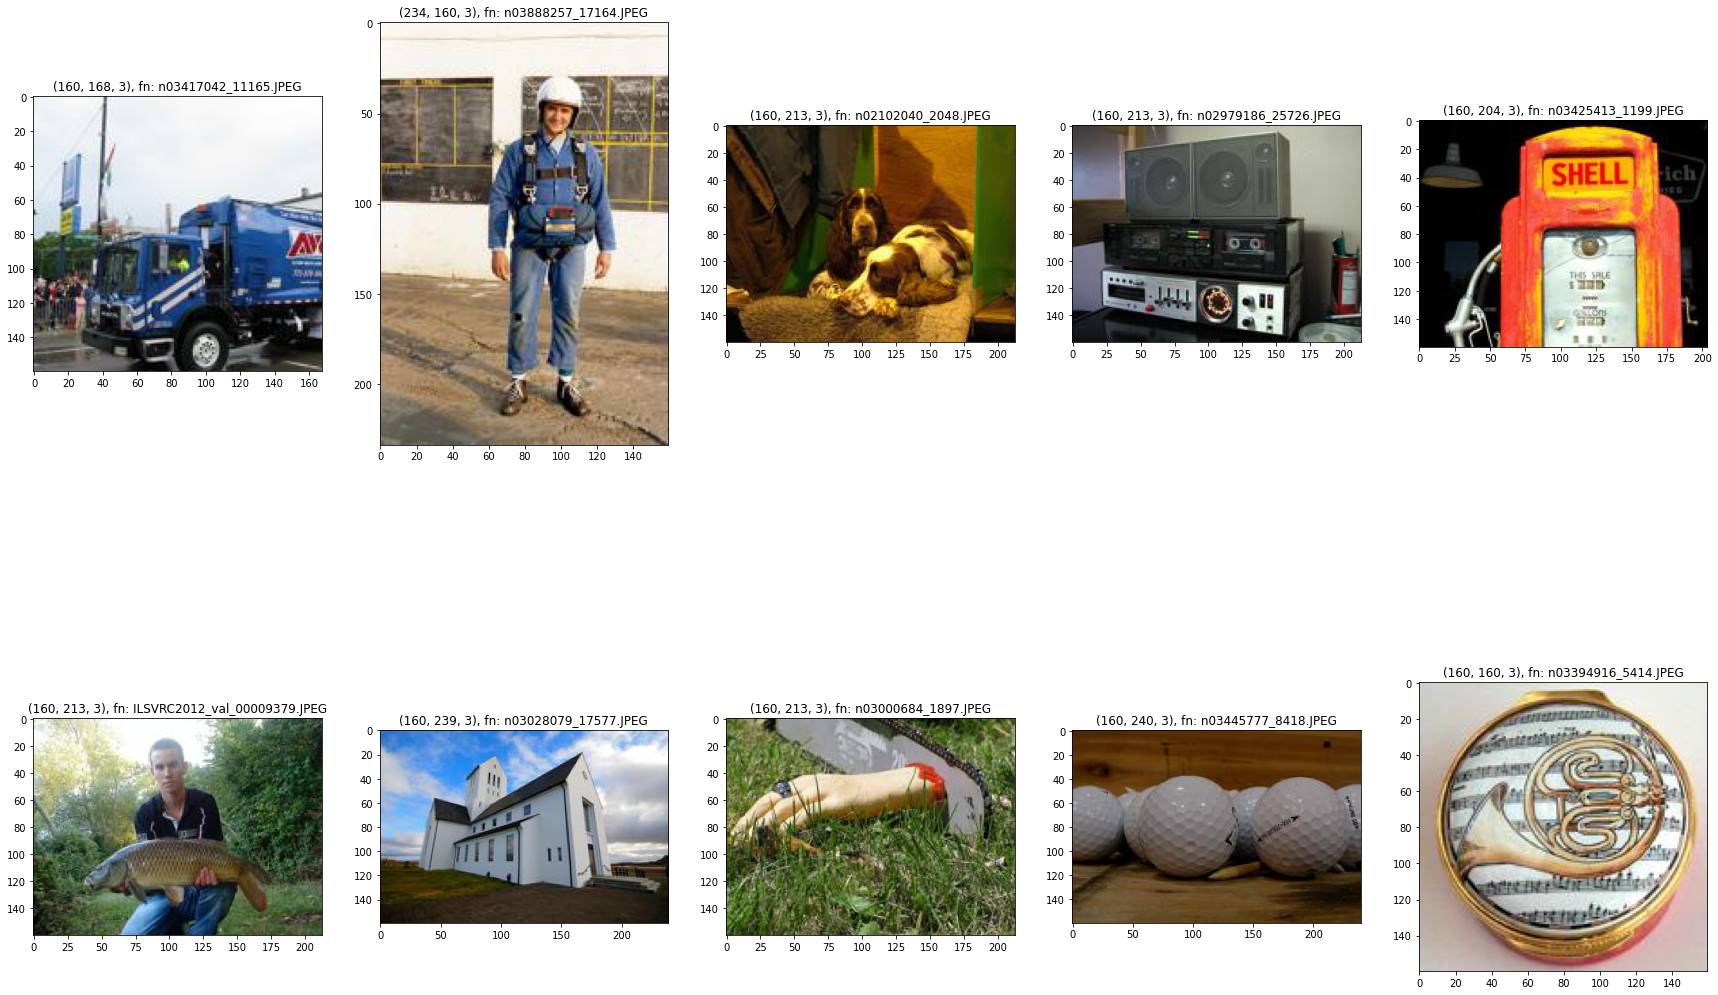

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(30, 20))
for idx, (class_path, ax) in enumerate(zip(train_dir, axes.flatten())):
    img_path = class_path.ls()[0]
    img = PIL.Image.open(img_path)
    ax.set_title(f"{numpy.array(img).shape}, fn: {img_path.name}")
    ax.imshow(img)

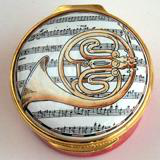

In [ ]:
img=PIL.Image.open(img_path); img

---

## mimetype: mapping filename to media type 
https://docs.python.org/3/library/mimetypes.html

In [9]:
import mimetypes

In [10]:
len(mimetypes.types_map), mimetypes.types_map

(566,
 {'.%': 'application/x-trash',
  '.323': 'text/h323',
  '.3gp': 'video/3gpp',
  '.7z': 'application/x-7z-compressed',
  '.a': 'application/octet-stream',
  '.abw': 'application/x-abiword',
  '.ai': 'application/postscript',
  '.aif': 'audio/x-aiff',
  '.aifc': 'audio/x-aiff',
  '.aiff': 'audio/x-aiff',
  '.alc': 'chemical/x-alchemy',
  '.amr': 'audio/amr',
  '.anx': 'application/annodex',
  '.apk': 'application/vnd.android.package-archive',
  '.appcache': 'text/cache-manifest',
  '.application': 'application/x-ms-application',
  '.art': 'image/x-jg',
  '.asc': 'text/plain',
  '.asf': 'video/x-ms-asf',
  '.asn': 'chemical/x-ncbi-asn1-spec',
  '.aso': 'chemical/x-ncbi-asn1-binary',
  '.asx': 'video/x-ms-asf',
  '.atom': 'application/atom+xml',
  '.atomcat': 'application/atomcat+xml',
  '.atomsrv': 'application/atomserv+xml',
  '.au': 'audio/basic',
  '.avi': 'video/x-msvideo',
  '.awb': 'audio/amr-wb',
  '.axa': 'audio/annodex',
  '.axv': 'video/annodex',
  '.b': 'chemical/x-molcon

In [11]:
# all media
set(v.split('/')[0] for k, v in mimetypes.types_map.items())

{'application',
 'audio',
 'chemical',
 'image',
 'message',
 'model',
 'text',
 'video',
 'x-conference',
 'x-epoc',
 'x-world'}

In [12]:
get_extensions= lambda x: set(k for k, v in mimetypes.types_map.items() if v.startswith(f'{x}/'))

In [13]:
list(map(get_extensions, ['image','text','audio']))

[{'.art',
  '.bmp',
  '.cdr',
  '.cdt',
  '.cpt',
  '.cr2',
  '.crw',
  '.djv',
  '.djvu',
  '.erf',
  '.gif',
  '.ico',
  '.ief',
  '.jng',
  '.jp2',
  '.jpe',
  '.jpeg',
  '.jpf',
  '.jpg',
  '.jpg2',
  '.jpm',
  '.jpx',
  '.nef',
  '.orf',
  '.pat',
  '.pbm',
  '.pcx',
  '.pgm',
  '.png',
  '.pnm',
  '.ppm',
  '.psd',
  '.ras',
  '.rgb',
  '.svg',
  '.svgz',
  '.tif',
  '.tiff',
  '.wbmp',
  '.xbm',
  '.xpm',
  '.xwd'},
 {'.323',
  '.appcache',
  '.asc',
  '.bib',
  '.boo',
  '.brf',
  '.c',
  '.c++',
  '.cc',
  '.cls',
  '.cpp',
  '.csh',
  '.css',
  '.csv',
  '.cxx',
  '.d',
  '.diff',
  '.etx',
  '.gcd',
  '.h',
  '.h++',
  '.hh',
  '.hpp',
  '.hs',
  '.htc',
  '.htm',
  '.html',
  '.hxx',
  '.ics',
  '.icz',
  '.jad',
  '.java',
  '.ksh',
  '.lhs',
  '.ltx',
  '.ly',
  '.markdown',
  '.md',
  '.mml',
  '.moc',
  '.p',
  '.pas',
  '.patch',
  '.pl',
  '.pm',
  '.pot',
  '.py',
  '.rtx',
  '.scala',
  '.sct',
  '.sfv',
  '.sgm',
  '.sgml',
  '.sh',
  '.shtml',
  '.srt',
  '.sty',


In [14]:
' '.join(get_extensions('text'))

'.323 .sgm .uls .srt .pl .ttl .c++ .cxx .vcs .tk .py .wmls .asc .etx .hxx .java .tsv .icz .ly .diff .sfv .css .appcache .cls .patch .wsc .cpp .md .boo .gcd .htc .brf .tex .jad .c .sty .wml .csh .h .hpp .vcard .d .bib .markdown .pas .tcl .sgml .sh .hh .scala .text .tm .shtml .sct .pot .cc .vcf .mml .txt .rtx .hs .moc .htm .p .ics .ltx .csv .h++ .pm .ksh .lhs .html'

In [15]:
path

PosixPath('/root/.fastai/data/imagenette2-160')

In [16]:
tench_path = path/'train/n01440764'

In [17]:
set(fpath.suffix for fpath in tench_path.ls())

{'.JPEG'}

- A4

In [18]:
def setify(o): return o if isinstance(o, set) else set(listify(o))
image_extensions = get_extensions('image')

## Obtain all list of files in path

In [19]:
import os

In [20]:
#  jeremy did implement like this to utilize os.walk
def _get_files(p, fs, extensions=None):
    """Glue path filename in filelist(fs)"""
    p = Path(p)
    res = [p/f for f in fs if not f.startswith('.')
           and ((not extensions) or f'.{f.split(".")[-1].lower()}' in extensions)]
    return res

In [21]:
fnames = [f.name for f in os.scandir(tench_path)]

In [22]:
t = _get_files(tench_path, fnames, extensions=image_extensions)

In [23]:
def get_files(path, extensions=None, recurse=False, include=None):
    path = Path(path)
    extensions = {e.lower() for e in setify(extensions)}
    if recurse:
        res = []
        for i, (p, d, f) in enumerate(os.walk(path)): # dirpath, dirnames, filenames
            if include is not None and i == 0:
                # subdirectory name filtering, d[:] for not copying address
                d[:] = [o for o in d if o in include] #filtering with matched keyword
            else:
                d[:] = [o for o in d if not o.startswith('.')] # exclude hidden files
            res += _get_files(p, f, extensions)
        return res
    else:
        f = [o.name for o in os.scandir(path) if o.is_file()]
        return _get_files(path, f, extensions)

In [24]:
t_fns = get_files(tench_path, get_extensions('image'), True)
f'number of tench image file: {len(t_fns)}'

'number of tench image file: 963'

In [25]:
all_fns = get_files(path, get_extensions('image'), recurse=True)
f'a number of all image files: {len(all_fns)}'

'a number of all image files: 13394'

---

### ITEMLIST

In [26]:
def compose(x, funcs, *args, order_key='_order', **kwargs):
    key = lambda o: getattr(o, order_key, 0)
    for f in sorted(listify(funcs), key=key):
        x = f(x, **kwargs)
    return x

In [27]:
import inspect
print(inspect.getsource(ListContainer))

class ListContainer():
    def __init__(self, items): self.items = listify(items)
    def __getitem__(self, idx):
        try: return self.items[idx]
        except TypeError:
            if isinstance(idx[0],bool):
                assert len(idx)==len(self) # bool mask
                return [o for m,o in zip(idx,self.items) if m]
            return [self.items[i] for i in idx]
    def __len__(self): return len(self.items)
    def __iter__(self): return iter(self.items)
    def __setitem__(self, i, o): self.items[i] = o
    def __delitem__(self, i): del(self.items[i])
    def __repr__(self):
        res = f'{self.__class__.__name__} ({len(self)} items)\n{self.items[:10]}'
        if len(self)>10: res = res[:-1]+ '...]'
        return res



In [28]:
class ItemList(ListContainer):
    def __init__(self, items, path='.', tfms=None):
        super().__init__(items)
        self.path, self.tfms = Path(path), tfms
    def __repr__(self): return f'{super().__repr__()}\nPath: {self.path}'
    def new(self, items, cls=None):
        if cls is None: cls=self.__class__
        return cls(items, self.path, tfms=self.tfms)
    def get(self, i): return i
    def _get(self, i): return compose(self.get(i), self.tfms)
    def __getitem__(self, i):
        res = super().__getitem__(i)
        if isinstance(res, list): return [self._get(o) for o in res]
        return self._get(res)
class ImageList(ItemList):
    @classmethod
    def from_files(cls, path, extensions=None, recurse=True, include=None, **kwargs):
        if extensions is None: extensions = image_extensions
        return cls(get_files(path, extensions, recurse=recurse, include=include), path, **kwargs)
    def get(self, fn): return PIL.Image.open(fn)
class Transform(): _order=0
class MakeRGB(Transform):
    def __call__(self, item): return item.convert('RGB')
def make_rgb(item): return item.convert('RGB')

In [29]:
img_list = ImageList.from_files(path, tfms=make_rgb)
img_list
# img = img_list[0]; img

ImageList (13394 items)
[PosixPath('/root/.fastai/data/imagenette2-160/val/n03888257/n03888257_27671.JPEG'), PosixPath('/root/.fastai/data/imagenette2-160/val/n03888257/n03888257_22212.JPEG'), PosixPath('/root/.fastai/data/imagenette2-160/val/n03888257/n03888257_9552.JPEG'), PosixPath('/root/.fastai/data/imagenette2-160/val/n03888257/n03888257_35962.JPEG'), PosixPath('/root/.fastai/data/imagenette2-160/val/n03888257/n03888257_15491.JPEG'), PosixPath('/root/.fastai/data/imagenette2-160/val/n03888257/n03888257_7311.JPEG'), PosixPath('/root/.fastai/data/imagenette2-160/val/n03888257/n03888257_29191.JPEG'), PosixPath('/root/.fastai/data/imagenette2-160/val/n03888257/n03888257_28352.JPEG'), PosixPath('/root/.fastai/data/imagenette2-160/val/n03888257/n03888257_3142.JPEG'), PosixPath('/root/.fastai/data/imagenette2-160/val/n03888257/n03888257_9671.JPEG')...]
Path: /root/.fastai/data/imagenette2-160

In [30]:
img_list.__class__.__mro__

(__main__.ImageList, __main__.ItemList, exp.nb_06.ListContainer, object)

Now we've attained all file names using `ImageList.from_files()` and now we are about to divide train / valid using its folder name.

In [31]:
# %debug img_list[0]

A6

In [32]:
img_list.items[0].parent.parent

PosixPath('/root/.fastai/data/imagenette2-160/val')

In [33]:
def split_by_fn(items, f):
    """function returns true when it's train dataset, otherwise false"""
    masks = [f(i) for i in items]
    # here you'd better to filter explicitly wheter its true , false or none since item can be not train nor the valid.
    ts=[img for img, m in zip(items, masks) if m==True]
    vs=[img for img, m in zip(items, masks) if m==False]
    return ts, vs
def grandparent_splitter(fn, valid_name='valid', train_name = 'train'):
    ds = fn.parent.parent.name
    return True if ds == train_name else False if ds == valid_name else None


# trainset, validset = split_by_fn(img_list, splitter)
# len(trainset), len(validset)

In [34]:
splitter = partial(grandparent_splitter, valid_name = 'val')

A7

In [35]:
import typing

In [36]:
[i for i in dir(typing)]

['AbstractSet',
 'Any',
 'AnyStr',
 'AsyncContextManager',
 'AsyncGenerator',
 'AsyncIterable',
 'AsyncIterator',
 'Awaitable',
 'BinaryIO',
 'ByteString',
 'CT_co',
 'Callable',
 'ChainMap',
 'ClassVar',
 'Collection',
 'Container',
 'ContextManager',
 'Coroutine',
 'Counter',
 'DefaultDict',
 'Deque',
 'Dict',
 'ForwardRef',
 'FrozenSet',
 'Generator',
 'Generic',
 'Hashable',
 'IO',
 'ItemsView',
 'Iterable',
 'Iterator',
 'KT',
 'KeysView',
 'List',
 'Mapping',
 'MappingView',
 'Match',
 'MethodDescriptorType',
 'MethodWrapperType',
 'MutableMapping',
 'MutableSequence',
 'MutableSet',
 'NamedTuple',
 'NamedTupleMeta',
 'NewType',
 'NoReturn',
 'Optional',
 'OrderedDict',
 'Pattern',
 'Reversible',
 'Sequence',
 'Set',
 'Sized',
 'SupportsAbs',
 'SupportsBytes',
 'SupportsComplex',
 'SupportsFloat',
 'SupportsInt',
 'SupportsRound',
 'T',
 'TYPE_CHECKING',
 'T_co',
 'T_contra',
 'Text',
 'TextIO',
 'Tuple',
 'Type',
 'TypeVar',
 'Union',
 'VT',
 'VT_co',
 'V_co',
 'ValuesView',
 'W

In [37]:
class SplitData():
    def __init__(self, train, valid): self.train, self.valid = train, valid
    def __getattr__(self, k): return getattr(self.train, k)
    def __setstate__(self, data:Any): self.__dict__.update(data)
    @classmethod
    def split_by_func(cls, il, f):
        lists = map(il.new, split_by_fn(il.items, f))
        return cls(*lists)
    def __repr__(self): return f'{self.__class__.__name__}\nTrain: {self.train}\nValid: {self.valid}\n'

In [38]:
splitdt = SplitData.split_by_func(img_list, splitter)

In [39]:
splitdt.train

ImageList (9469 items)
[PosixPath('/root/.fastai/data/imagenette2-160/train/n03888257/ILSVRC2012_val_00023107.JPEG'), PosixPath('/root/.fastai/data/imagenette2-160/train/n03888257/n03888257_10079.JPEG'), PosixPath('/root/.fastai/data/imagenette2-160/train/n03888257/n03888257_15946.JPEG'), PosixPath('/root/.fastai/data/imagenette2-160/train/n03888257/ILSVRC2012_val_00015689.JPEG'), PosixPath('/root/.fastai/data/imagenette2-160/train/n03888257/n03888257_22305.JPEG'), PosixPath('/root/.fastai/data/imagenette2-160/train/n03888257/n03888257_14853.JPEG'), PosixPath('/root/.fastai/data/imagenette2-160/train/n03888257/n03888257_22053.JPEG'), PosixPath('/root/.fastai/data/imagenette2-160/train/n03888257/n03888257_7046.JPEG'), PosixPath('/root/.fastai/data/imagenette2-160/train/n03888257/n03888257_67319.JPEG'), PosixPath('/root/.fastai/data/imagenette2-160/train/n03888257/n03888257_24804.JPEG')...]
Path: /root/.fastai/data/imagenette2-160

A8

In [40]:
d = {}
for i in 'abcdefghijklmnop': d[i] = 1
OrderedDict.fromkeys(d), OrderedDict.fromkeys(d).keys()

(OrderedDict([('a', None),
              ('b', None),
              ('c', None),
              ('d', None),
              ('e', None),
              ('f', None),
              ('g', None),
              ('h', None),
              ('i', None),
              ('j', None),
              ('k', None),
              ('l', None),
              ('m', None),
              ('n', None),
              ('o', None),
              ('p', None)]),
 odict_keys(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p']))

In [41]:
from collections import OrderedDict
def uniqueify(x, sort=False):
    res = list(OrderedDict.fromkeys(x).keys())
    if sort: res.sort()
    return res

In [42]:
class Processor():
    def process(self, items): return items
class CategoryProcessor(Processor):
    def __init__(self): self.vocab = None
    def __call__(self, items):
        if self.vocab is None:
            self.vocab = uniqueify(items)
            self.otoi  = {v:k for k, v in enumerate(self.vocab)}
        return [self.proc1(o) for o in items]
    def proc1(self, item): return self.otoi[item]
    def deprocess(self, idxs):
        # we can retrieve only when processed vocabulary exists
        assert self.vocab is not None
        return [self.deproc1(idx) for idx in idxs]
    def deproc1(self, idx): return self.vocab[idx]

In [43]:
{i.parent.name for i in splitdt.train.items}, {i.parent.name for i in splitdt.valid.items}
compose([2,1,3], None)
compose([2,1,3], sorted)

[1, 2, 3]

In [44]:
def parent_labeler(fn): return fn.parent.name
def _label_by_func(ds, f, cls=ItemList): return cls([f(o) for o in ds.items], path=ds.path)
class LabeledData():
    def process(self, il, proc):
        # after applying process to il.items, new object of itemlist
        return il.new(compose(il.items, proc))
    def __init__(self, x, y, proc_x = None, proc_y = None):
        self.x, self.y = self.process(x, proc_x), self.process(y, proc_y)
        self.proc_x, self.proc_y = proc_x, proc_y
    def __repr__(self): return f'{self.__class__.__name__}\nx: {self.x}\ny: {self.y}\n'
    def __getitem__(self, idx): return self.x[idx], self.y[idx]
    def __len__(self): return len(self.x)
    def x_obj(self, idx): return self.obj(self.x, idx, self.proc_x)
    def y_obj(self, idx): return self.obj(self.y, idx, self.proc_y)
    def obj(self, items, idx, procs):
        '''kind of compositional functions, but in this case it restores object'''
        isint = isinstance(idx, int) or (isinstance(idx, torch.LongTensor) and not idx.ndim) # right condition ensures 0d tensor
        item = items[idx]
        for proc in reversed(listify(procs)): #reversed: to restore object from preprocessed one
            item = proc.deproc1(item) if isint else proc.deprocess(item)
        return item
    @classmethod
    def label_by_func(cls, il, f, proc_x=None, proc_y=None):
        return cls(il, _label_by_func(il, f), proc_x=proc_x, proc_y=proc_y)

def label_by_func(sd, f, proc_x=None, proc_y=None):
    '''as label_by_func is classmethod, it initilize (splitted) itemlist of train/valid
    note that by using ItemList.new method
    '''
    train = LabeledData.label_by_func(sd.train, f, proc_x=proc_x, proc_y=proc_y)
    valid = LabeledData.label_by_func(sd.valid, f, proc_x=proc_x, proc_y=proc_y)
    return SplitData(train, valid)

In [45]:
img_list = ImageList.from_files(path, tfms=make_rgb) #get all imagelist
splitter = partial(grandparent_splitter, valid_name = 'val') # define spilt function which divides train/valid given function
sd = SplitData.split_by_func(img_list, splitter) # split all data to train/valid and save it to instance attr
il = label_by_func(sd, parent_labeler, proc_y=CategoryProcessor()) # make labeld data w.r.t. train's category names

- A9

In [ ]:
# to check image sizes
from collections import Counter
Counter([il.train.x.get(obj).size for obj in il.train.x]) # see the status of image size
sizeset = set();
[sizeset.update(il.train.x.get(obj).size) for obj in il.train.x]
sizeset

- see what skimage does

In [47]:
import skimage
[o for o in dir(skimage) if not o.startswith('_')]

import skimage.io
print(splitdt.train.items[0])
img = skimage.io.imread(splitdt.train.items[0])
img[0].size

import skimage.transform
skimage.transform.resize(img, (120, 120)).dtype

/root/.fastai/data/imagenette2-160/train/n03888257/ILSVRC2012_val_00023107.JPEG


dtype('float64')

todo   
1. fix image size
2. convert to bytes
3. convert to tensors

In [49]:
# !pip install ipdb
# import ipdb

- what is PIL.image.BILINEAR??[PIL document](https://https://pillow.readthedocs.io/en/stable/releasenotes/2.7.0.html)

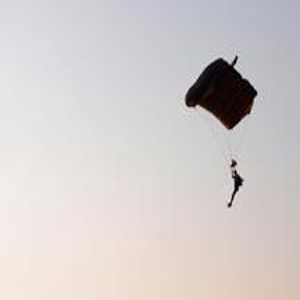

In [50]:
il.train[0][0].resize((300, 300), PIL.Image.BILINEAR)
il.train[0][0].resize((300, 300), PIL.Image.BICUBIC)

In [51]:
class ResizeFixed(Transform):
    _order = 10
    def __init__(self, size):
        if isinstance(size, int): size = (size, size)
        self.size = size
    def __call__(self, x):
        return x.resize(self.size, PIL.Image.BILINEAR)

def byte_to_tensor(item):
    '''bytetensor, resize, position'''
    res = torch.ByteTensor(torch.ByteStorage.from_buffer(item.tobytes()))
    return res.view((*(item.size), -1)).permute(2, 0, 1) #as torch gets channel, height, width
    
byte_to_tensor._order=10

def tensor_to_float(item):
    return item.float().div_(255.)
tensor_to_float._order=20

`def make_rgb(item): return item.convert('RGB')`

In [ ]:
(*(il.train[0][0].size), 1)

In [ ]:
transformers = [make_rgb, ResizeFixed(120), byte_to_tensor, tensor_to_float]

img_list = ImageList.from_files(path, tfms=transformers) #get all imagelist
sd = SplitData.split_by_func(img_list, splitter) # split all data to train/valid and save it to instance attr
il = label_by_func(sd, parent_labeler, proc_y=CategoryProcessor()) #make labeld data w.r.t. train's category names
il.train[0][0].shape

In [ ]:
ResizeFixed(120)(il.train[0][0])

## DataBunch

In [52]:
class DataBunch():
    def __init__(self, train_dl, valid_dl, c_in=None, c_out=None):
        self.train_dl, self.valid_dl = train_dl, valid_dl;
        self.c_in, self.c_out = c_in, c_out
    @property #as we have to access dataset through dataloader, here we implement dataset property
    def train_ds(self):
        return self.train_dl.dataset
    @property
    def valid_ds(self):
        return self.valid_dl.dataset

def databunchify(sd, bs, c_in=None, c_out=None, **kwargs):
    dls = get_dls(sd.train, sd.valid, bs, **kwargs)
    return DataBunch(*dls, c_in=c_in, c_out=c_out)

In [53]:
import inspect
print(inspect.getsource(datasets.untar_data))

def untar_data(url:str, fname:PathOrStr=None, dest:PathOrStr=None, data=True, force_download=False, verbose=False) -> Path:
    "Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`."
    dest = url2path(url, data) if dest is None else Path(dest)/url2name(url)
    fname = Path(ifnone(fname, _url2tgz(url, data)))
    if force_download or (fname.exists() and url in _checks and _check_file(fname) != _checks[url]):
        print(f"A new version of the {'dataset' if data else 'model'} is available.")
        if fname.exists(): os.remove(fname)
        if dest.exists(): shutil.rmtree(dest)
    if not dest.exists():
        fname = download_data(url, fname=fname, data=data)
        if url in _checks:
            assert _check_file(fname) == _checks[url], f"Downloaded file {fname} does not match checksum expected! Remove that file from {Config().data_archive_path()} and try your code again."
        if verbose: print('.tgz file downloaded. Extracting the contents...')

In [54]:
bs = 32

In [55]:
path = datasets.untar_data(datasets.URLs.IMAGENETTE_160)
transformers = [make_rgb, ResizeFixed(128), byte_to_tensor, tensor_to_float]
img_list = ImageList.from_files(path, tfms=transformers)

SplitData.to_databunch = databunchify
split_data = SplitData.split_by_func(img_list, partial(grandparent_splitter, valid_name='val'))
label_list = label_by_func(split_data, parent_labeler, proc_y=CategoryProcessor())
data = label_list.to_databunch(bs, c_in=3, c_out=10, num_workers=8)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))

---

## Inspect mean and std through batches

In [56]:
m, std = [], []
for (x, y) in data.train_dl:
    m.append(x.mean((0, 2, 3)))
    std.append(x.std((0, 2, 3)))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


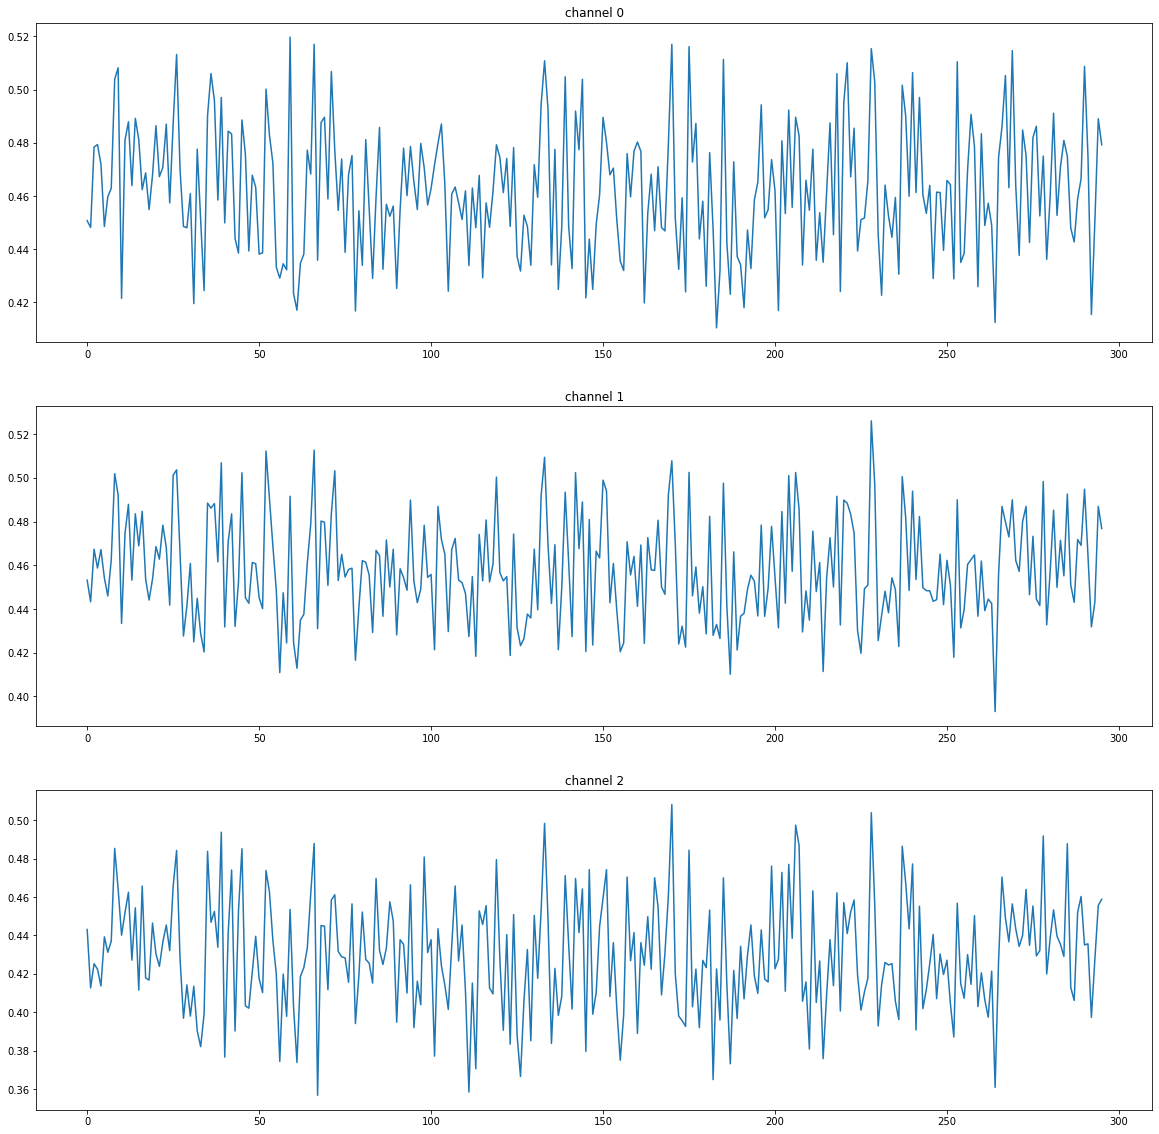

In [57]:
fig, axes = plt.subplots(3, figsize=(20, 20))
for i, ax in enumerate(axes):
    ax.plot(torch.stack(m)[:, i])
    ax.title.set_text(f"channel {i}")

## Model

In [58]:
x, y = next(iter(data.train_dl))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [59]:
m, s = x.mean((0, 2, 3)), x.std((0, 2, 3))

In [87]:
_m, _s = m.detach().clone().cuda(), s.detach().clone().cuda()

In [88]:
def normalize_channel(x, mean, std):
    # add axis to the last 2 (height, width) as we will normalize through the channel
    return (x-mean[..., None, None]) / std[..., None, None]
norm_imagenette = partial(normalize_channel, mean=_m, std=_s)

In [91]:
cbfs = [partial(AvgStatsCallback, accuracy),
        CudaCallback]
cbfs.append(partial(BatchTransformXCallback, norm_imagenette))

In [63]:
import inspect; inspect.getsource(cos_1cycle_anneal)

'def cos_1cycle_anneal(start, high, end):\n    return [sched_cos(start, high), sched_cos(high, end)]\n'

In [64]:
print(inspect.getsource(conv_layer))

def conv_layer(ni, nf, ks=3, stride=2, bn=True, **kwargs):
    layers = [nn.Conv2d(ni, nf, ks, padding=ks//2, stride=stride, bias=not bn),
              GeneralRelu(**kwargs)]
    if bn: layers.append(nn.BatchNorm2d(nf, eps=1e-5, momentum=0.1))
    return nn.Sequential(*layers)



In [68]:
prev_pow_2(3*9)

16

In [94]:
nfs = [64, 64, 128, 256]
import math
def prev_pow_2(x): return 2**math.floor(math.log2(x))

def get_cnn_layers(data, nfs, layer, **kwargs):
    def f(ni, nf, stride=2): return layer(ni, nf, 3, stride=stride, **kwargs)
    l1 = data.c_in
    l2 = prev_pow_2(l1*3*3)

    layers = [f(l1, l2, stride=1), # c_in, 2* log2(c_in*9)
              f(l2, l2*2, stride=1),
              f(l2*2, l2*4, stride=1)
    ]

    nfs = [l2*4] + nfs

    layers += [f(nfs[i], nfs[i+1]) for i in range(len(nfs)-1)]
    layers += [nn.AdaptiveAvgPool2d(1), Lambda(flatten), nn.Linear(nfs[-1], data.c_out)]

    return layers

In [95]:
def get_cnn_model(data, nfs, layer, **kwargs):
    return nn.Sequential(*get_cnn_layers(data, nfs, layer, **kwargs))

def get_learn_run(data, nfs, lr, layer, cbs=None, opt_func = None, **kwargs):
    model = get_cnn_model(data, nfs, layer, **kwargs)
    init_cnn(model)
    return get_runner(model, data, lr=lr, cbs=cbs, opt_func = opt_func)
sched = combine_scheds([0.3, 0.7], [sched_cos(0.1, 0.3), sched_cos(0.3, 0.05)])

In [80]:
cbfs

[functools.partial(<class 'exp.nb_05b.AvgStatsCallback'>, <function accuracy at 0x7f761da87200>),
 exp.nb_06.CudaCallback,
 functools.partial(<class 'exp.nb_06.BatchTransformXCallback'>, functools.partial(<function normalize_channel at 0x7f7621571170>, mean=tensor([0.4136, 0.3964, 0.3489]), std=tensor([0.2569, 0.2531, 0.2649])))]

In [97]:
learn, run = get_learn_run(data, nfs, 0.2, conv_layer, cbs=cbfs + [partial(ParamScheduler, 'lr', sched)])
run.fit(10, learn)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


train: [1.7455648860756152, tensor(0.3913, device='cuda:0')]
valid: [2.756175607085987, tensor(0.2757, device='cuda:0')]
train: [1.4515891494614004, tensor(0.5134, device='cuda:0')]
valid: [1.4100332155652866, tensor(0.5383, device='cuda:0')]
train: [1.2746563209552224, tensor(0.5787, device='cuda:0')]
valid: [1.3161747362659235, tensor(0.5689, device='cuda:0')]
train: [1.0817741404517371, tensor(0.6440, device='cuda:0')]
valid: [1.1959890027866242, tensor(0.5985, device='cuda:0')]
train: [0.9146942902497623, tensor(0.7038, device='cuda:0')]
valid: [0.9090138584792994, tensor(0.7121, device='cuda:0')]
train: [0.7434407672404689, tensor(0.7634, device='cuda:0')]
valid: [0.8788385748407643, tensor(0.7210, device='cuda:0')]
train: [0.582653552051431, tensor(0.8161, device='cuda:0')]
valid: [0.7812806653065286, tensor(0.7592, device='cuda:0')]
train: [0.4341488096023867, tensor(0.8681, device='cuda:0')]
valid: [0.7320968103105095, tensor(0.7710, device='cuda:0')]
train: [0.3196028188612181

In [98]:
print(inspect.getsource(find_modules))

def find_modules(m, cond):
    if cond(m): return [m]
    return sum([find_modules(o,cond) for o in m.children()], [])



In [100]:
def model_summary(run, learn, data, find_all=False):
    xb, yb = get_batch(data.valid_dl, run)
    device = next(learn.model.parameters()).device
    xb, yb = xb.to(device), yb.to(device)
    mods = find_modules(learn.model, is_lin_layer) if find_all else learn.model.children()
    f = lambda hook, mod, inp, out: print(f"{mod}\n{out.shape}\n")
    with Hooks(mods, f) as hooks: learn.model(xb)

In [101]:
model_summary(run, learn, data)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (1): GeneralRelu()
  (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
torch.Size([64, 16, 128, 128])

Sequential(
  (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (1): GeneralRelu()
  (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
torch.Size([64, 32, 128, 128])

Sequential(
  (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (1): GeneralRelu()
  (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
torch.Size([64, 64, 128, 128])

Sequential(
  (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (1): GeneralRelu()
  (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
torch.Size([64, 64, 64, 64])

Sequential(
  (0): Conv2d(64, 64, kernel_size=(